**Fronteira Eficiente de Markowitz**

Neste exercicio de simulação computacional, irei modelar a fronteira eficiente de Markovitz considerando um portfólio contendo dois ativos: ABEV3 e BOVA11.

Upload bibliotecas

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

In [10]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [5]:
pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 4.3 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


Dados

In [5]:
ativos=['ABEV3.SA','BOVA11.SA']

data=pd.DataFrame()

for atv in ativos:
  data[atv]=wb.DataReader(atv, data_source='yahoo',start='2010-1-1')['Adj Close']



Analise descritiva

In [6]:
data.describe()

,ABEV3.SA,BOVA11.SA
count,3190.000000,3190.000000
mean,12.927405,72.308568
std,4.189745,22.393609
min,3.663527,36.450001
25%,11.309388,54.262499
50%,14.298309,64.905003
75%,15.921064,92.715000
max,21.439583,125.750000


Analise grafica da evolução dos ativos

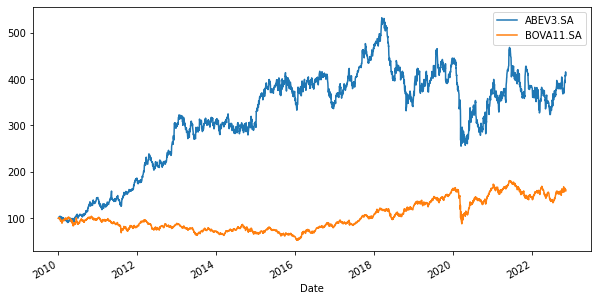

In [7]:
(data/data.iloc[0]*100).plot(figsize=(10,5))

Analise do retorno logaritmico

In [10]:
log_ret= np.log(data/data.shift(1))
log_ret.mean()*250

ABEV3.SA     0.110397
BOVA11.SA    0.036341
dtype: float64

In [11]:
log_ret.cov()*250

,ABEV3.SA,BOVA11.SA
ABEV3.SA,0.069803,0.033412
BOVA11.SA,0.033412,0.062978


Como demonstram os valores e o gráfico acima, há pouca correlação entre os retorno da ABEV3 e o indice bovespa no periodo analisado.

Definição dos pesos

In [18]:
pesos=np.random.random(len(ativos))
pesos /=np.sum(pesos)
pesos

array([0.33334178, 0.66665822])

Retorno esperado do portfólio

In [19]:
np.sum(pesos*log_ret.mean())*250

0.061027083454053874

O retorno médio esperado do portifólio é igual a aproximadamente 6%.

Variância do retorno esperado do portifólio

In [20]:
np.dot(pesos.T,np.dot(log_ret.cov()*250,pesos))

0.05059563452947219

A variância esperada do portifólio é igual a aproximadamente 5%.

Volatilidade esperada do retorno do portifólio

In [21]:
np.sqrt(np.dot(pesos.T,np.dot(log_ret.cov()*250,pesos)))

0.22493473393291705

A volatidade do portfólio apresenta valor igual a aproximadamente 22,4%.

Retornos hipoteticos x volatilidade

In [29]:
pf_ret=[]
pf_vol=[]

for z in range(1000):
  pesos=np.random.random(len(ativos))
  pesos /=np.sum(pesos)
  pf_ret.append(np.sum(pesos*log_ret.mean())*250)
  pf_vol.append(np.sqrt(np.dot(pesos.T,np.dot(log_ret.cov()*250,pesos))))


In [35]:
#Mostrando apenas os 5 primeiros valores de cada array para tornar mais sucinta a aprsentação.


pf_ret[0:5], pf_vol[0:5]


([0.09030456590617796,
  0.06917002653655994,
  0.0894405362230274,
  0.08428872505932226,
  0.10904806283984204],
 [0.2343311865359386,
  0.2229935655913827,
  0.23342770033661678,
  0.22878238136741183,
  0.26172293440956207])

Análise dos resultados

In [36]:
# Transformar arrays em dataframe

portfólios = pd.DataFrame({'Retornos': pf_ret, 'Volatilidade': pf_vol})

In [37]:
portfólios.describe()

,Retornos,Volatilidade
count,1000.000000,1000.000000
mean,0.073475,0.231615
std,0.017862,0.009943
min,0.037229,0.222990
25%,0.060833,0.223906
50%,0.073425,0.227268
75%,0.086930,0.236033
max,0.110292,0.264008


O retorno médio e a volatilidade das 1000 simulações foram iguais a aproximadamente 7% e 23% respectivamente. Sendo que o retorno maximo encontrado foi igual a 11% e a volatilidade maxima igual a 26,4%.

Análise gráfica da fronteira eficiente de Markowitz

Text(0, 0.5, 'Retorno esperado')

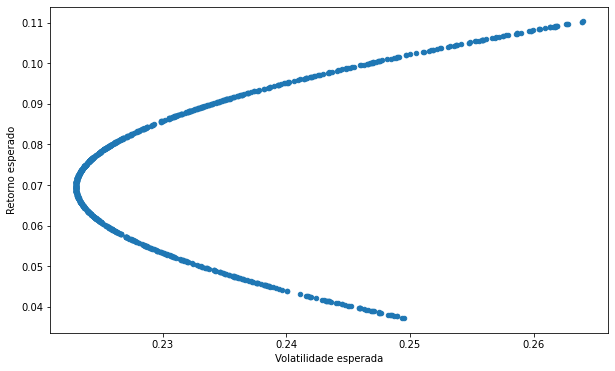

In [40]:
portfólios.plot(x='Volatilidade',y='Retornos', kind='scatter', figsize=(10,6));
plt.xlabel('Volatilidade esperada')
plt.ylabel('Retorno esperado')